In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
class Pillis_RK4:

    def __init__(self, b: list, c: list, d: list, r: list, s: float, rho: float, x: float):

        self.b = b 
        self.c = c
        self.d = d 
        self.r = r 
        self.s = s 
        self.rho = rho 
        self.x = x 

    def model(self, input: np.array):

        dn = self.r[1] * input[0] * (1. - self.b[1] * input[0]) - self.c[3] * input[1] * input[0]
        dt = self.r[0] * input[1] * (1. - self.b[0] * input[1]) - self.c[1] * input[2] * input[1] - self.c[2] * input[1] * input[0]
        di = self.s + (self.rho * input[1] * input[2])/(self.x + input[1]) - self.c[0] * input[1] * input[2] - self.d[0] * input[2]
        
        return np.array([dn, dt, di])

    def __call__(self, input: np.array, dt: float = 1e-1):

        k1 = dt * self.model(input)
        k2 = dt * self.model(input + 0.5 * k1)
        k3 = dt * self.model(input + 0.5 * k2)
        k4 = dt * self.model(input + k3)

        return input + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0

In [3]:
# Inicialização
pillis = Pillis_RK4(
    b = [1., 1.],
    c = [1., 0.5, 1., 1.],
    d = [0.2, 1.],
    r = [1.5, 1.],
    s = 0.33,
    rho = 0.01,
    x = 0.3
)

In [4]:
# Parâmetros
periodo = 80
dt = 1 / 24
concentração_inicial = [0.9, 0.25, 0.25]

# hiperparâmetros
dias = np.arange(0, periodo, dt)
resultado = np.zeros((len(dias), 3))
resultado[0] = concentração_inicial

for i in range(1, len(dias)): resultado[i] = pillis(resultado[i-1], dt)

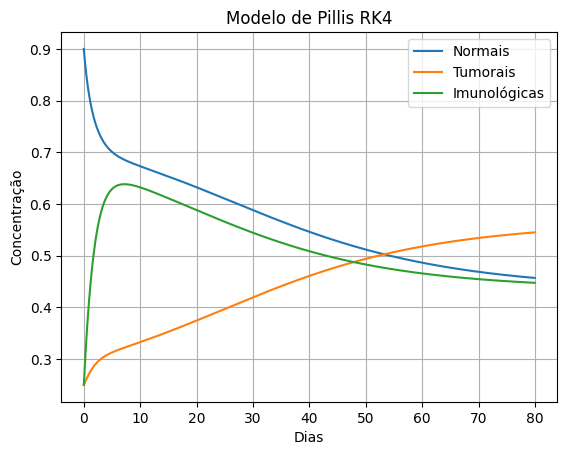

In [5]:
# Plotagem
plt.plot(dias, resultado[:, 0], label = 'Normais')
plt.plot(dias, resultado[:, 1], label = 'Tumorais')
plt.plot(dias, resultado[:, 2], label = 'Imunológicas')

plt.title('Modelo de Pillis RK4')
plt.xlabel('Dias')
plt.ylabel('Concentração')

plt.legend()
plt.grid()
plt.show()